# Modelos lineales y regularizacion

In [1]:
import numpy as np

n=100
X = 2 * np.random.rand(n, 1)
y = 4 + 3 * X + np.random.randn(n, 1)

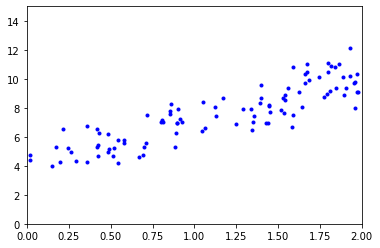

In [2]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
X_b = np.c_[np.ones((n, 1)), X] # add x0 = 1 to each instance
# w_hat 
w_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
X_b.shape

(100, 2)

In [5]:
print(w_hat)

[[4.1184183 ]
 [2.99922368]]


In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(w_hat)

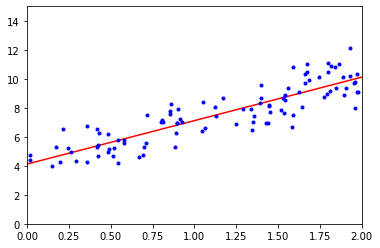

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)
print('Coeficientes Manual : ',w_hat)

Coeficientes Sklearn :  [4.1184183] [[2.99922368]]
Coeficientes Manual :  [[4.1184183 ]
 [2.99922368]]


# Regularizacion

In [9]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * np.sin(X) + np.random.randn(100, 1)

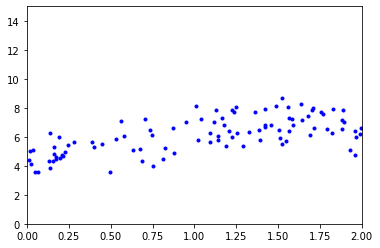

In [10]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

In [ ]:
X_p[0]

array([1.        , 1.75705675, 3.08724843])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
r2=lin_reg.score(X, y)
print('Coeficiente Determinacion :',r2)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)

Coeficiente Determinacion : 0.39007262277083776
Coeficientes Sklearn :  [4.56530569] [[1.48675753]]


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)
print('Coeficiente Determinacion :',r2)

Coeficientes Sklearn :  [4.02462452] [[ 0.          3.1073279  -0.80935799]]
Coeficiente Determinacion : 0.42051678772550866


In [ ]:
y_predict=lin_reg.predict(X_p)

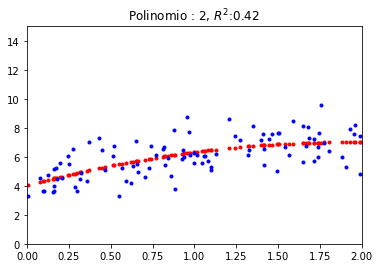

In [ ]:
plt.plot(X_p[:,1], y_predict, "r.")
plt.plot(X,y,'b.')
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(2,r2))
plt.axis([0, 2, 0, 15])
plt.show()

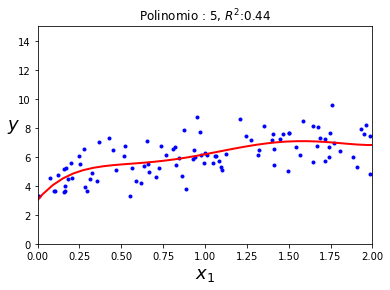

In [ ]:
K=5
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

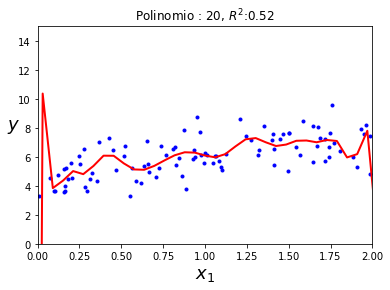

In [ ]:
K=20
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

In [ ]:
print(X_p.shape)

(100, 21)


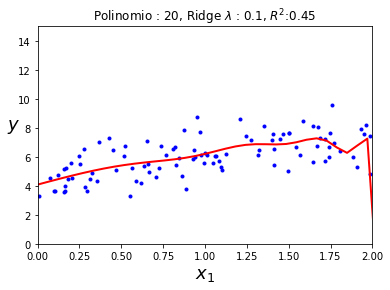

In [ ]:
from sklearn.linear_model import Ridge

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

ridge_reg = Ridge(alpha=lamb, solver="cholesky", random_state=42)
ridge_reg.fit(X_p, y)
r2=ridge_reg.score(X_p, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = ridge_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, Ridge $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.16127105687363, tolerance: 0.01892441780847124
  positive)


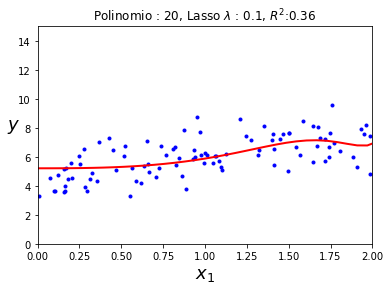

In [ ]:
from sklearn.linear_model import Lasso

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_p, y)
r2=lasso_reg.score(X_p, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lasso_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, Lasso $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

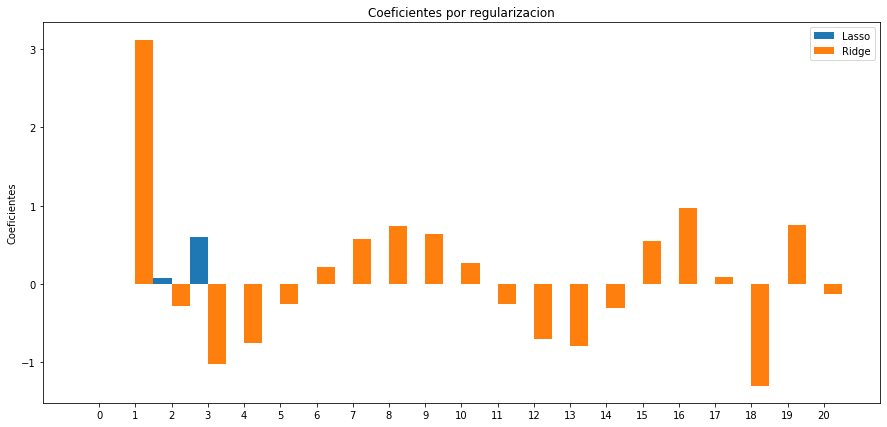

In [ ]:
x = np.arange(len(lasso_reg.coef_))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, lasso_reg.coef_, width, label='Lasso')
rects2 = ax.bar(x + width/2, ridge_reg.coef_[0], width, label='Ridge')
#rects3 = ax.bar(x + width/2, lin_reg.coef_[0], width, label='Linear')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes por regularizacion')
ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.legend()

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir el total de 'nuevos casos' a partir de las distintas vacunas y las medidas administradas en Chile.
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo regularizacion.


In [12]:
import pandas as pd

data_cases = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv",
    keep_default_na=False,
    na_values=[""],
)

In [13]:
for i,c in enumerate(data_cases.columns):
  print(i,c)

0 date
1 location_key
2 new_confirmed
3 new_deceased
4 new_recovered
5 new_tested
6 cumulative_confirmed
7 cumulative_deceased
8 cumulative_recovered
9 cumulative_tested


In [14]:
cases_bolivia=data_cases[data_cases.location_key=='BO']

In [25]:
cases_bolivia.shape

(658, 10)

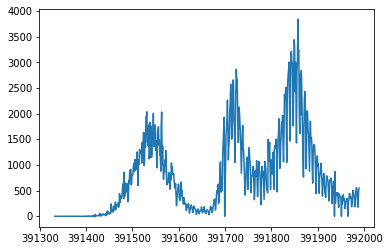

In [27]:
cases_bolivia['new_confirmed'].plot()

In [18]:
data_vaccines = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/vaccinations.csv",
    keep_default_na=False,
    na_values=[""],
)

In [19]:
data_vaccines[data_vaccines.location_key=='BO'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
new_persons_vaccinated,206.0,2.757431e+04,1.611223e+05,-1106411.0,2280.75,8035.0,24904.00,1431134.0
cumulative_persons_vaccinated,207.0,1.465363e+06,1.384446e+06,0.0,163820.50,1004613.0,2948535.50,4252426.0
new_persons_fully_vaccinated,206.0,2.222231e+04,9.475739e+04,-489210.0,679.75,6610.5,29334.00,762181.0
cumulative_persons_fully_vaccinated,207.0,8.898139e+05,1.060779e+06,0.0,64369.00,296588.0,1823049.00,3258388.0
new_vaccine_doses_administered,153.0,4.530516e+04,7.078258e+04,12.0,6996.00,23085.0,52392.00,501685.0
cumulative_vaccine_doses_administered,154.0,2.021552e+06,2.132955e+06,0.0,318602.50,1044046.0,3493784.75,6931689.0
new_persons_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cumulative_persons_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_persons_fully_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cumulative_persons_fully_vaccinated_pfizer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
vaccines_bolivia=data_vaccines[data_vaccines.location_key=='BO']

In [21]:
data_response = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/oxford-government-response.csv",
    keep_default_na=False,
    na_values=[""],
)

In [22]:
data_response[data_response.location_key=='BO'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school_closing,651.0,2.282642e+00,9.265269e-01,0.0,2.00,3.00,3.0,3.0
workplace_closing,651.0,1.182796e+00,1.124036e+00,0.0,0.00,1.00,2.0,3.0
cancel_public_events,651.0,1.006144e+00,8.978396e-01,0.0,0.00,1.00,2.0,2.0
restrictions_on_gatherings,651.0,1.740399e+00,1.868413e+00,0.0,0.00,1.00,4.0,4.0
public_transport_closing,651.0,9.400922e-01,9.254218e-01,0.0,0.00,1.00,2.0,2.0
stay_at_home_requirements,642.0,1.216511e+00,9.585033e-01,0.0,0.00,2.00,2.0,3.0
restrictions_on_internal_movement,651.0,9.554531e-01,9.095292e-01,0.0,0.00,1.00,2.0,2.0
international_travel_controls,651.0,2.516129e+00,1.519403e+00,0.0,1.00,3.00,4.0,4.0
income_support,643.0,8.491446e-01,3.581865e-01,0.0,1.00,1.00,1.0,1.0
debt_relief,651.0,8.632873e-01,8.689805e-01,0.0,0.00,1.00,2.0,2.0


In [23]:
response_bolivia=data_response.loc[data_response.location_key=='BO']

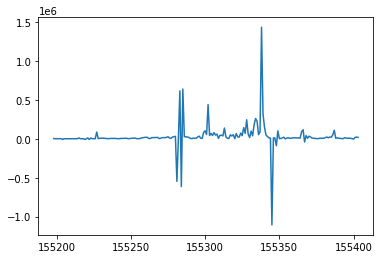

In [28]:
vaccines_bolivia['new_persons_vaccinated'].plot()

In [30]:
remove_outliers=vaccines_bolivia['new_persons_vaccinated'].between(0, vaccines_bolivia['new_persons_vaccinated'].quantile(.95))

In [31]:
vaccines_bolivia=vaccines_bolivia[remove_outliers]

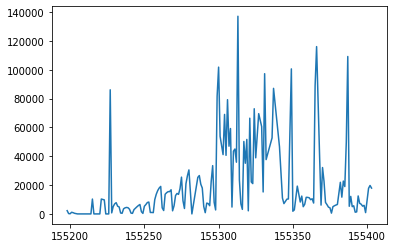

In [32]:
vaccines_bolivia['new_persons_vaccinated'].plot()

In [33]:
cases_bolivia.set_index('date',inplace=True)
vaccines_bolivia.set_index('date',inplace=True)
response_bolivia.set_index('date',inplace=True)

In [34]:
df_bolivia=pd.merge(cases_bolivia,vaccines_bolivia, left_index=True, right_index=True)

In [35]:
df_bolivia=pd.merge(df_bolivia,response_bolivia, left_index=True, right_index=True)

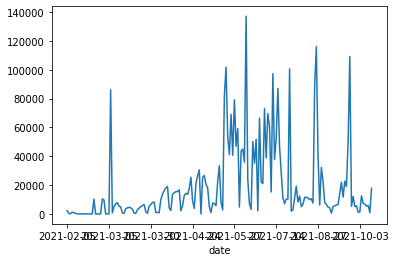

In [36]:
df_bolivia['new_persons_vaccinated'].plot()

In [37]:
y=df_bolivia['new_confirmed']
X=df_bolivia[['new_persons_vaccinated','school_closing','workplace_closing','cancel_public_events','facial_coverings']]

In [40]:
X.fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [42]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
new_persons_vaccinated,183.0,18812.797814,26060.786307,0.0,3065.5,7895.0,22034.0,137072.0
school_closing,183.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
workplace_closing,183.0,0.316940,0.466560,0.0,0.0,0.0,1.0,1.0
cancel_public_events,183.0,0.316940,0.466560,0.0,0.0,0.0,1.0,1.0
facial_coverings,183.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


In [43]:
X['school_closing']=X['school_closing'].astype('category')
X['workplace_closing']=X['workplace_closing'].astype('category')
X['cancel_public_events']=X['cancel_public_events'].astype('category')
X['facial_coverings']=X['facial_coverings'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [44]:
X_new=pd.get_dummies(X,sparse=True)

In [46]:
X_new.head()

,new_persons_vaccinated,school_closing_2.0,workplace_closing_0.0,workplace_closing_1.0,cancel_public_events_0.0,cancel_public_events_1.0,facial_coverings_4.0
date,,,,,,,
2021-02-05,2258.0,1,1,0,1,0,1
2021-02-06,206.0,1,1,0,1,0,1
2021-02-07,116.0,1,1,0,1,0,1
2021-02-08,1153.0,1,1,0,1,0,1
2021-02-09,847.0,1,1,0,1,0,1


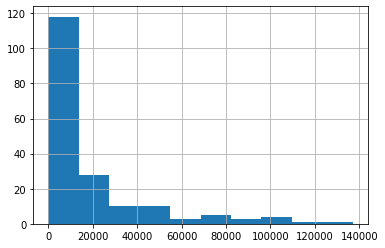

In [48]:
X_new['new_persons_vaccinated'].hist()

In [49]:
X_new['new_persons_vaccinated']=np.log1p(X_new['new_persons_vaccinated'])

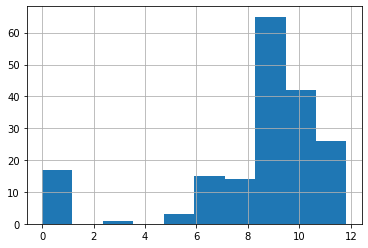

In [50]:
X_new['new_persons_vaccinated'].hist()

In [51]:
X_rolling=X_new.rolling(7).mean()
y_rolling=y.rolling(7).mean()

In [52]:
X_rolling.dropna(inplace=True)
y_rolling.dropna(inplace=True)

In [55]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_rolling,y_rolling, test_size=0.2, random_state=42)

In [56]:
y_train.shape

(141,)

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
r2=lin_reg.score(X_test, y_test)
print('Coeficiente Determinacion :',r2)

Coeficiente Determinacion : 0.420975629139719


In [60]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
r2=lasso_reg.score(X_test, y_test)
print('Coeficiente Determinacion :',r2)

Coeficiente Determinacion : 0.42291750652090454


In [65]:
df_bolivia.columns

Index(['location_key_x', 'new_confirmed', 'new_deceased', 'new_recovered',
       'new_tested', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_tested', 'location_key_y',
       'new_persons_vaccinated', 'cumulative_persons_vaccinated',
       'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated',
       'new_vaccine_doses_administered',
       'cumulative_vaccine_doses_administered',
       'new_persons_vaccinated_pfizer', 'cumulative_persons_vaccinated_pfizer',
       'new_persons_fully_vaccinated_pfizer',
       'cumulative_persons_fully_vaccinated_pfizer',
       'new_vaccine_doses_administered_pfizer',
       'cumulative_vaccine_doses_administered_pfizer',
       'new_persons_vaccinated_moderna',
       'cumulative_persons_vaccinated_moderna',
       'new_persons_fully_vaccinated_moderna',
       'cumulative_persons_fully_vaccinated_moderna',
       'new_vaccine_doses_administered_moderna',
       'cumulative_vaccine_doses_

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X=df_bolivia[df_bolivia.columns.difference(['new_confirmed','location_key_x','location_key','location_key_y'])]
X.fillna(0,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


regr_1 = DecisionTreeRegressor(max_depth=80)

regr_1 = regr_1.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [64]:
r2=regr_1.score(X_test, y_test)
print('Coeficiente Determinacion :',r2)

Coeficiente Determinacion : 0.7451244008728082
